# Modelo 02


Primeras filas del DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Información sobre el DataFrame:
<class 'pandas.core.frame

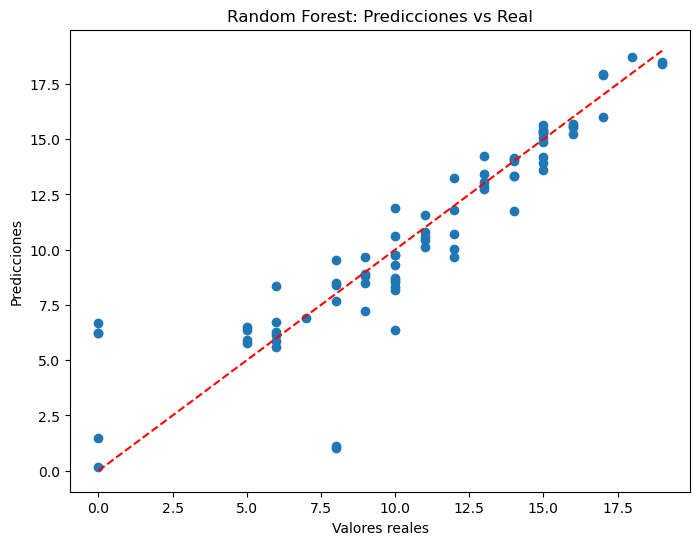

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

file_path = 'student-mat.csv'  
df = pd.read_csv(file_path, delimiter=';')
print("Primeras filas del DataFrame:")
print(df.head())

print("\nInformación sobre el DataFrame:")
print(df.info())
df_dummies = pd.get_dummies(df, drop_first=True)

print("\nColumnas después de la conversión a dummy:")
print(df_dummies.columns)
X = df_dummies.drop(columns=['G3'])  
y = df_dummies['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nModelo de Random Forest:")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2: {r2_rf}")

# Hiperparámetros para Random Forest, se usa GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("\nMejor Modelo de Random Forest (con GridSearchCV):")
print(f"MSE: {mse_best_rf}")
print(f"RMSE: {rmse_best_rf}")
print(f"R2: {r2_best_rf}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf)
plt.title("Random Forest: Predicciones vs Real")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()  